In [1]:
#Note: we denote L2 for euclidian norm and l2 for function norm (we switched the standard nomenclature)
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Generation plots of Thesis Document

In [2]:
%matplotlib inline
import pandas as pd
from plot_graphs import plot_weight_estim_loss_thesis

simu_file_cleaned = "/Users/mehdi/temp/simus weight vector/GLU_valid_2017-06-12_18.37.51/cleaned_results_N_100_500_1000_GLU_2017-06-12_18.37.51.csv"
df_cleaned = pd.read_csv(simu_file_cleaned)


IOError: File /Users/mehdi/temp/simus weight vector/GLU_valid_2017-06-12_18.37.51/cleaned_results_N_100_500_1000_GLU_2017-06-12_18.37.51.csv does not exist

/usr/local/lib/python2.7/site-packages/matplotlib/cbook.py:2032: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
/usr/local/lib/python2.7/site-packages/matplotlib/cbook.py:2058: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/usr/local/lib/python2.7/site-packages/matplotlib/cbook.py:2065: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/usr/local/lib/python2.7/site-packages/matplotlib/cbook.py:1977: RuntimeWarning: invalid value encountered in double_scalars
  notch_min = med - 1.57 * iqr / np.sqrt(N)


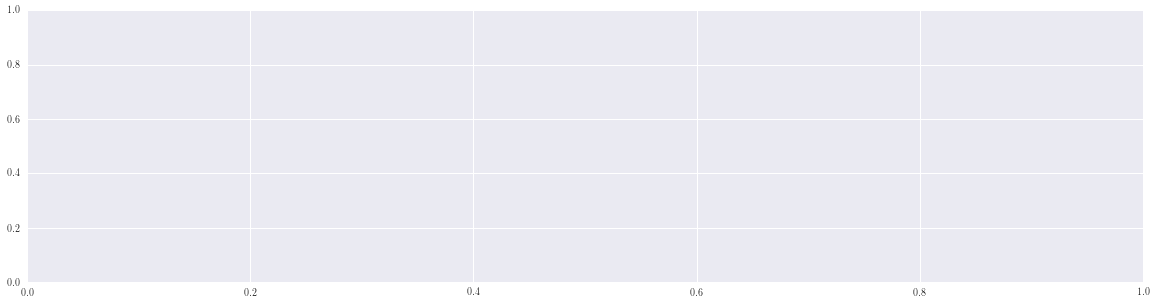

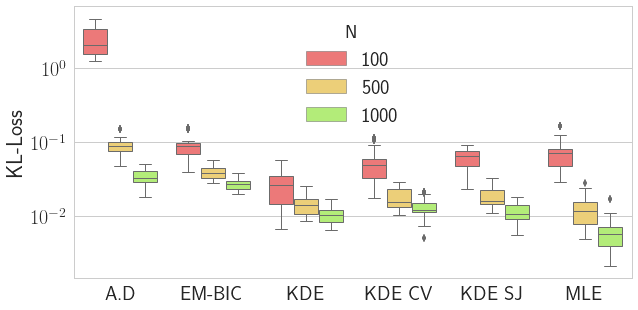

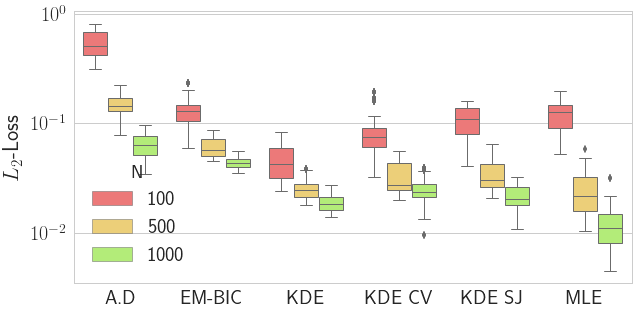

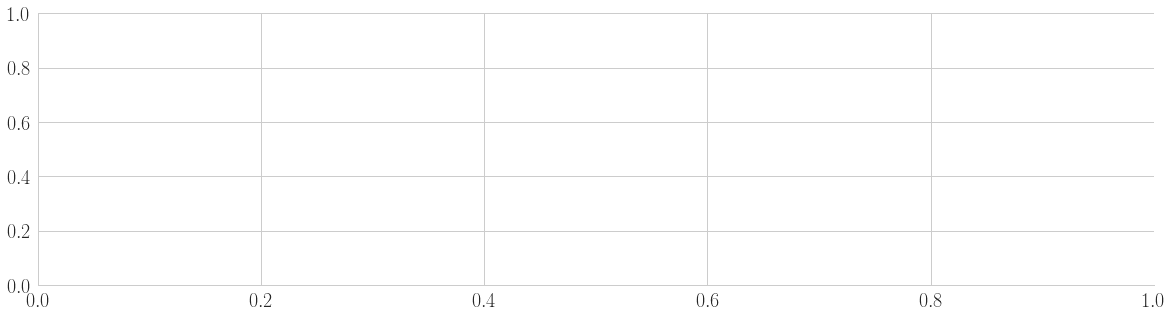

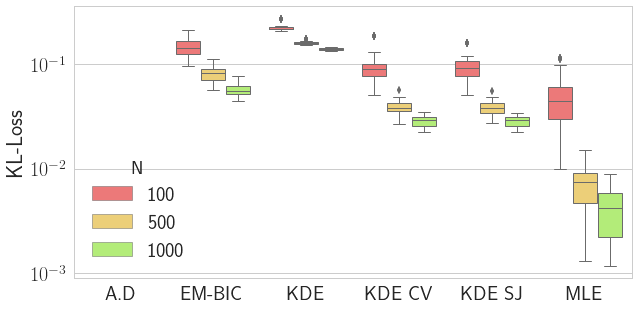

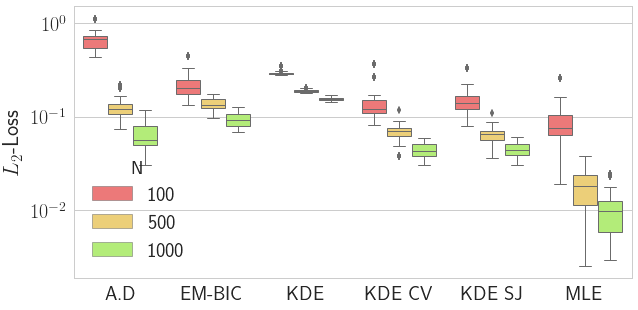

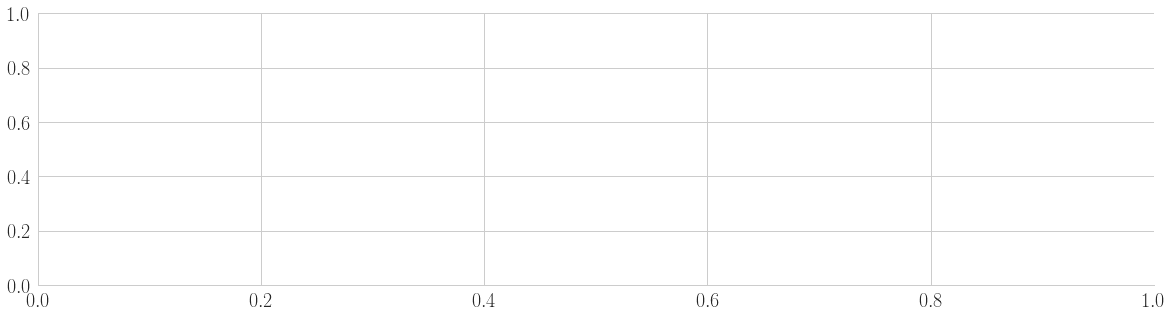

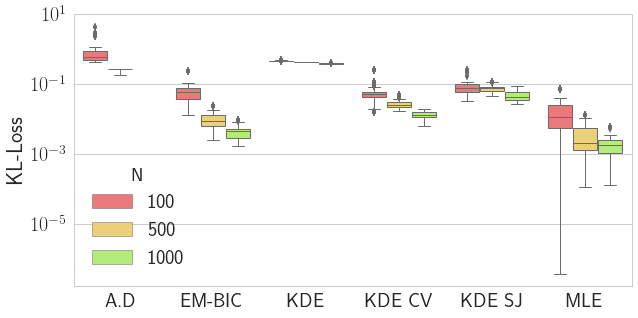

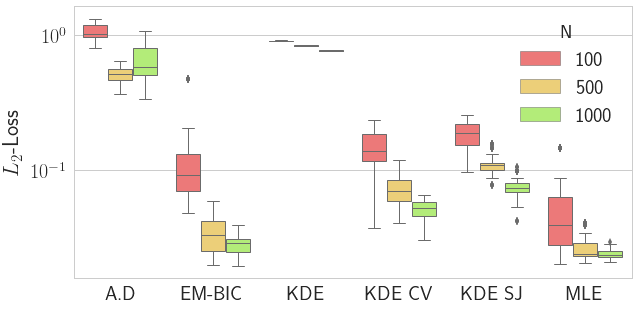

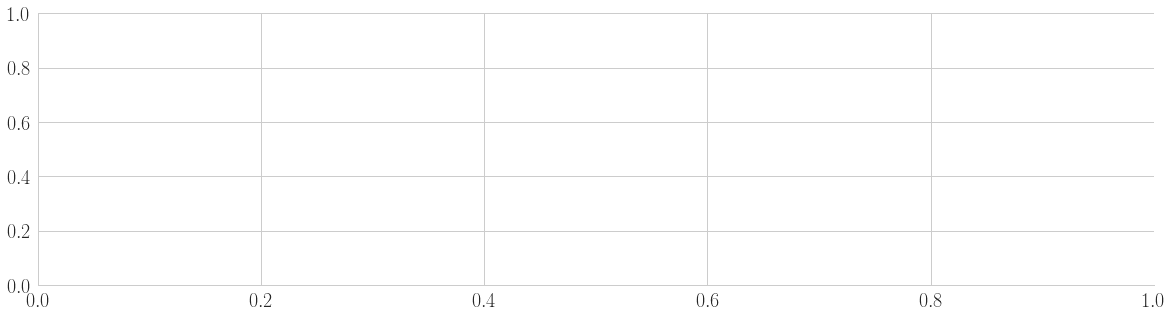

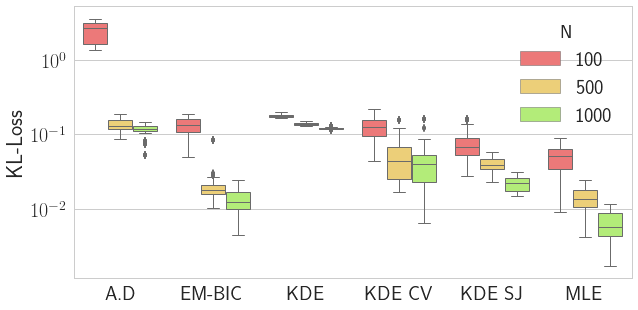

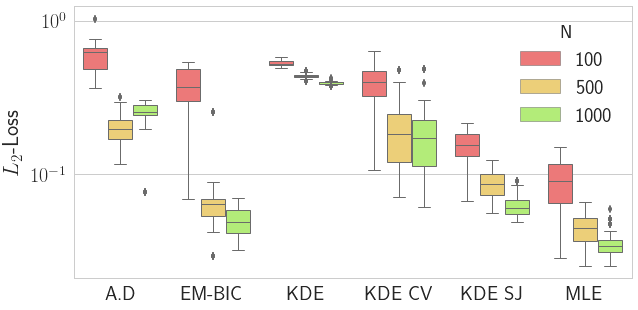

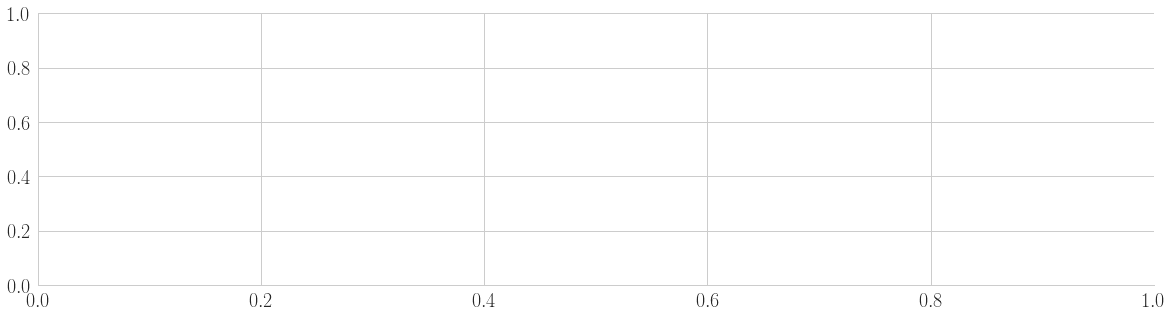

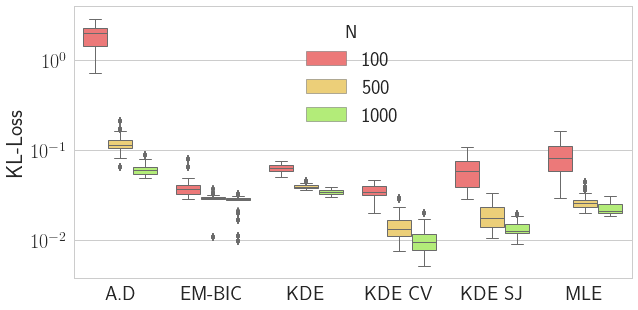

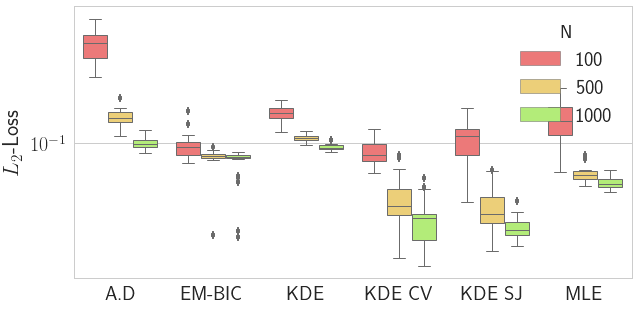

In [6]:
plot_weight_estim_loss_thesis(df_cleaned, "GLU")

# Time graphs

In [9]:
import pandas as pd
file_simu = "full_results_N_100_500_1000_GLU_2017-06-12_18.37.51.csv"
simu_file_folder = "/Users/mehdi/Downloads/GLU_valid_2017-06-12_18.37.51/"
df_full = pd.read_csv(simu_file_folder+file_simu)

In [10]:
df_full = df_full.drop(["Unnamed: 0"], axis=1)

In [28]:
from cv_kde_add import retrieve_type

In [52]:
selected_time_col = ["N"]+[c for c in df_full.columns if "time" in c]
df6 = df_full[selected_time_col]
df7 = pd.melt(df6, id_vars=["N"], var_name="Type", value_name="Time")
df_times = pd.concat([df7, df7.apply(retrieve_type, axis=1)], axis=1)


In [55]:
df_times.to_csv(simu_file_folder+"times.csv")

In [59]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

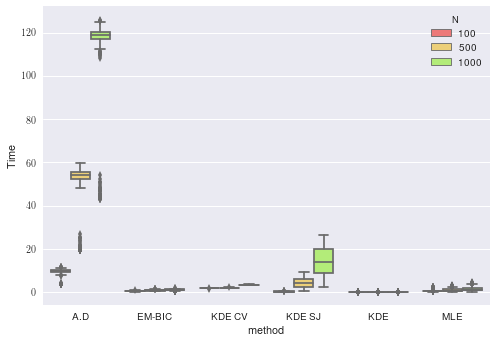

In [54]:
boxplot = sns.boxplot(x="method", y="Time", hue="N", data=df_times,
                         palette=["#ff6666", "#ffd966", "#b3ff66"])

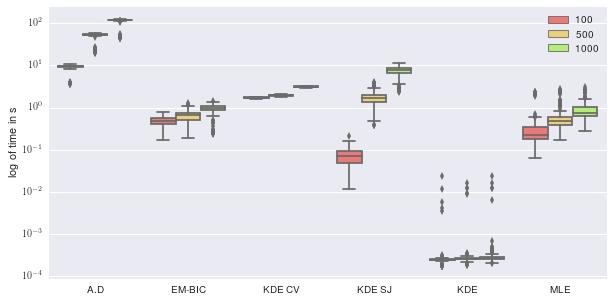

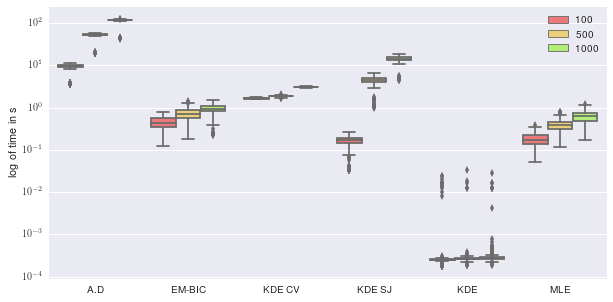

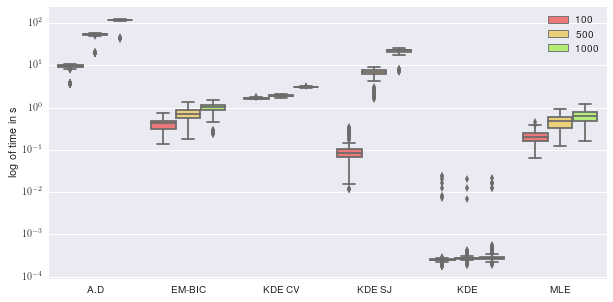

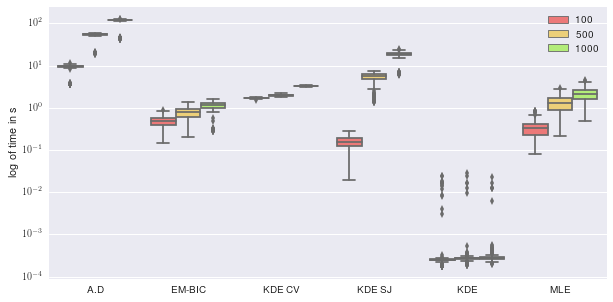

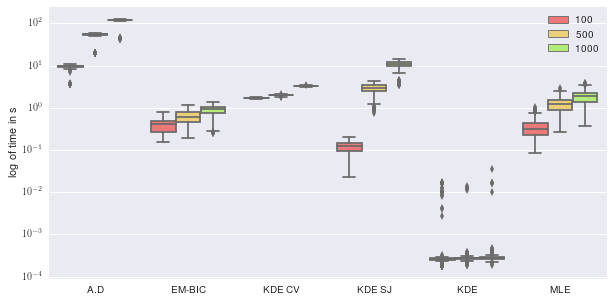

In [60]:
for type_dens in ["uniform", "rect", "gauss", "lapl_gauss", "lapl_gauss_not_dict"]:
    plt.figure(figsize=(10,5))
    df_temp = df_times[df_times["type_dens"]==type_dens]
    boxplot = sns.boxplot(x="method", y="Time", hue="N", data=df_temp,
                         palette=["#ff6666", "#ffd966", "#b3ff66"])
    for patch in boxplot.artists:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, 1))
    boxplot.set_xlabel('')
    boxplot.set_ylabel("log of time in s")
    sns_plot = boxplot.get_figure()
    for ax in sns_plot.get_axes():
        ax.set_yscale('log')
        ax.legend(bbox_to_anchor=(0, 0))
    plt.legend()
    sns_plot = boxplot.get_figure()
    sns_plot.savefig("../../phd-thesis/TeX_files/res_temp"+type_dens+"_times", dpi=100, transparent=True, bbox_inches='tight', pad_inches=0)
    


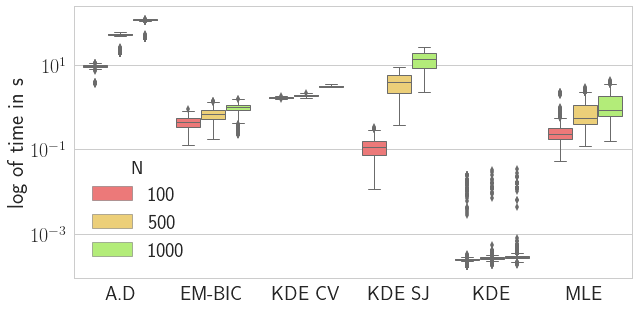

In [67]:
#merge all types of densities
boxplot = sns.boxplot(x="method", y="Time", hue="N", data=df_times,
                     palette=["#ff6666", "#ffd966", "#b3ff66"])
for patch in boxplot.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 1))
boxplot.set_xlabel('')
boxplot.set_ylabel("log of time in s")
sns_plot = boxplot.get_figure()
for ax in sns_plot.get_axes():
    ax.set_yscale('log')
sns_plot.savefig("../../phd-thesis/TeX_files/res_times", dpi=100, transparent=True, bbox_inches='tight', pad_inches=0)



# Graphs of weights support

In [15]:
from os import listdir
from os.path import isfile, join

simu_folder = "/Users/mehdi/temp/simus_weight_vector/GLU_valid_2017-06-12_18.37.51"
folder  = simu_folder
#folder = "/Users/mehdi/Downloads/"+simu_folder+"/"
onlyfiles = [f for f in listdir(folder) if (isfile(join(folder, f)) and f.startswith("res_K"))]

In [16]:
import pickle
data = []
for f in onlyfiles:
    data.append(pickle.load(open(simu_folder+"/"+f)))

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator GaussianMixture from version 0.18.1 when using version 0.18. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [17]:
import pandas as pd

In [39]:
df_lambda = pd.DataFrame(data, columns=['N', 'lapl_gauss_weight_vector_estim_lambda', 'gauss_weight_vector_estim_lambda', "lapl_gauss_adapative_dantzig", "gauss_adapative_dantzig"])

In [20]:
df_lambda.to_csv(simu_folder+"/lambda_ad_mle.csv")

## Gaussian density weight

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#simu_folder = "/Users/mehdi/temp/simus_weight_vector/GLU_valid_2017-06-12_18.37.51"
#folder  = simu_folder
#df_lambda = pd.read_csv(simu_folder+"/lambda_ad_mle.csv")
%matplotlib inline
df_gauss = df_lambda[['N', 'gauss_weight_vector_estim_lambda', "gauss_adapative_dantzig"]]

In [20]:
df_gauss

,N,gauss_weight_vector_estim_lambda,gauss_adapative_dantzig
0,1000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.19664490...","[2.77458279049e-13, 5.70901508567e-13, 5.77067..."
1,1000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.18717943...","[2.58208662171e-13, 5.21056727752e-13, 5.11433..."
2,1000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.18760140...","[3.23519887385e-13, 6.44834002935e-13, 6.10371..."
3,1000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.19995593...","[1.14555404878e-14, 2.28346566945e-14, 2.07118..."
4,1000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.19847853...","[2.05557219328e-13, 4.12683012838e-13, 4.46403..."
5,1000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.20031013...","[2.19695157818e-12, 4.44443785354e-12, 4.36803..."
6,1000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.19459710...","[2.07111268995e-12, 4.09682802696e-12, 3.77722..."
7,1000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.19995593...","[1.14555404878e-14, 2.28346566945e-14, 2.07118..."
8,1000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.19660703...","[1.20957126991e-12, 2.42181579549e-12, 2.32403..."
9,1000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.19847853...","[2.05557219328e-13, 4.12683012838e-13, 4.46403..."


### Indexes of real Gaussian of f_gauss

In [21]:
import matplotlib
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 

In [22]:
def extract(row):
    res = {}
    for i in [07, 11, 15, 19, 23]:
        res["mle_"+str(i)] = float(row['gauss_weight_vector_estim_lambda'][i])
        res["ad_"+str(i)] = float(row['gauss_adapative_dantzig'][i])
    res['N']= row['N']
    return pd.Series(res)

def extract_type(row):
    if "ad" in row["comp"]:
        method = "AD"
    else:
        method = "MLE"
    return pd.Series({'method': method})
def remove_method_comp(row):
    comp = row["comp"]
    comp = int(comp.split("_")[1])
    return pd.Series({'comp':comp, "N":row["N"],"weight": row["weight"], "method":row["method"] })

df2 = df_gauss.apply(extract, axis=1)
df3 = pd.melt(df2, id_vars=["N"], var_name="comp", value_name="weight")
df4 = pd.concat([df3, df3.apply(extract_type, axis =1)], axis=1)
df5 = df4.apply(remove_method_comp, axis=1)

In [8]:
#df5.to_csv(simu_folder+"/lambda_gauss_ad_mle.csv")
#df5 = pd.read_csv(simu_folder+"/lambda_gauss_ad_mle.csv")

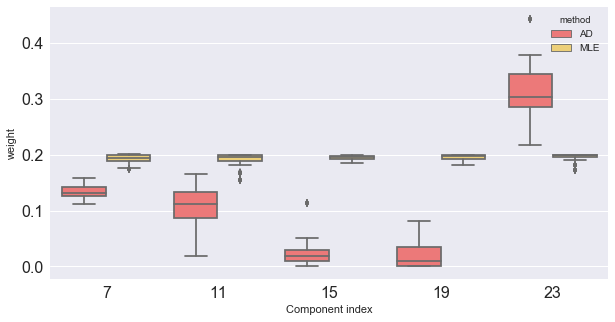

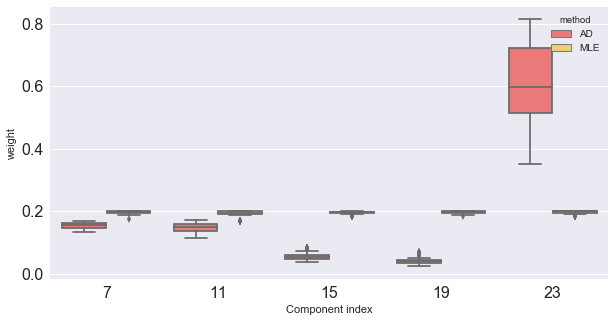

In [23]:
plt.figure(figsize=(10,5))
boxplot = sns.boxplot(x="comp", y="weight", hue="method", data=df5[df5["N"]==500],
                     palette=["#ff6666", "#ffd966", "#b3ff66"])
for patch in boxplot.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 1))
boxplot.set_xlabel('Component index')
sns_plot = boxplot.get_figure()
#for ax in sns_plot.get_axes():
#    ax.set_yscale('log')
plt.savefig("../../phd-thesis/TeX_files/weight_f_gauss_real_comp_N_500",dpi=100, transparent=True, bbox_inches='tight', pad_inches=0)

plt.figure(figsize=(10,5))
boxplot = sns.boxplot(x="comp", y="weight", hue="method", data=df5[df5["N"]==1000],
                     palette=["#ff6666", "#ffd966", "#b3ff66"])
for patch in boxplot.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 1))
boxplot.set_xlabel('Component index')
sns_plot = boxplot.get_figure()
#for ax in sns_plot.get_axes():
#    ax.set_yscale('log')
plt.savefig("../../phd-thesis/TeX_files/weight_f_gauss_real_comp_N_1000",dpi=100, transparent=True, bbox_inches='tight', pad_inches=0)


### Indexes of uniform components not on f_gauss

In [24]:
def extract(row):
    res = {}
    for i  in [58, 59, 60, 61, 62]:
        res["mle_"+str(i)] = row['gauss_weight_vector_estim_lambda'][i]
        res["ad_"+str(i)] = row['gauss_adapative_dantzig'][i]
    res['N']= row['N']
    return pd.Series(res)
def extract_type(row):
    if "ad" in row["comp"]:
        method = "AD"
    else:
        method = "MLE"
    return pd.Series({'method': method})
def remove_method_comp(row):
    comp = row["comp"]
    comp = int(comp.split("_")[1])
    return pd.Series({'comp':comp, "N":row["N"],"weight": row["weight"], "method":row["method"] })

df2 = df_gauss.apply(extract, axis=1)
df3 = pd.melt(df2, id_vars=["N"], var_name="comp", value_name="weight")
df4 = pd.concat([df3, df3.apply(extract_type, axis =1)], axis=1)
df5 = df4.apply(remove_method_comp, axis=1)

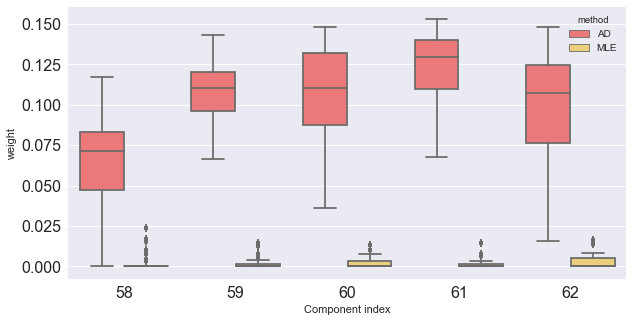

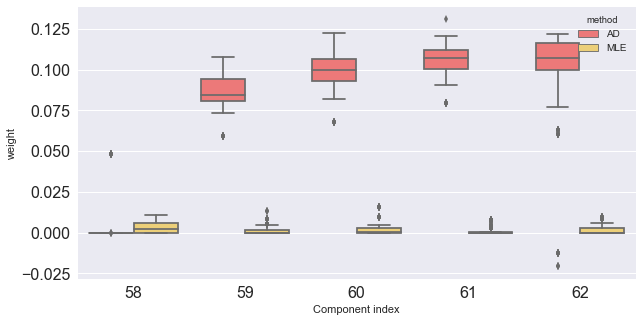

In [26]:
plt.figure(figsize=(10,5))

boxplot = sns.boxplot(x="comp", y="weight", hue="method", data=df5[df5["N"]==500],
                     palette=["#ff6666", "#ffd966", "#b3ff66"])
for patch in boxplot.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 1))
boxplot.set_xlabel('Component index')
sns_plot = boxplot.get_figure()
#for ax in sns_plot.get_axes():
#    ax.set_yscale('log')
plt.savefig("../../phd-thesis/TeX_files/weight_f_gauss_unif_comp_N_500",dpi=100, transparent=True, bbox_inches='tight', pad_inches=0)

##N=1000
plt.figure(figsize=(10,5))
boxplot = sns.boxplot(x="comp", y="weight", hue="method", data=df5[df5["N"]==1000],
                     palette=["#ff6666", "#ffd966", "#b3ff66"])
for patch in boxplot.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 1))
boxplot.set_xlabel('Component index')
sns_plot = boxplot.get_figure()
#for ax in sns_plot.get_axes():
#    ax.set_yscale('log')
plt.savefig("../../phd-thesis/TeX_files/weight_f_gauss_unif_comp_N_1000",dpi=100, transparent=True, bbox_inches='tight', pad_inches=0)


### other components gauss


In [52]:
def extract(row):
    res = {}
    for i  in [30, 31, 32, 33, 34]:
        res["mle_"+str(i)] = row['gauss_weight_vector_estim_lambda'][i]
        res["ad_"+str(i)] = row['gauss_adapative_dantzig'][i]
    res['N']= row['N']
    return pd.Series(res)
def extract_type(row):
    if "ad" in row["comp"]:
        method = "AD"
    else:
        method = "MLE"
    return pd.Series({'method': method})
def remove_method_comp(row):
    comp = row["comp"]
    comp = int(comp.split("_")[1])
    return pd.Series({'comp':comp, "N":row["N"],"weight": row["weight"], "method":row["method"] })

df2 = df_gauss.apply(extract, axis=1)
df3 = pd.melt(df2, id_vars=["N"], var_name="comp", value_name="weight")
df4 = pd.concat([df3, df3.apply(extract_type, axis =1)], axis=1)
df5_gauss_other = df4.apply(remove_method_comp, axis=1)

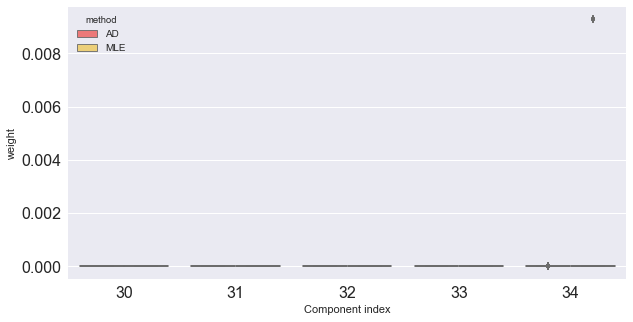

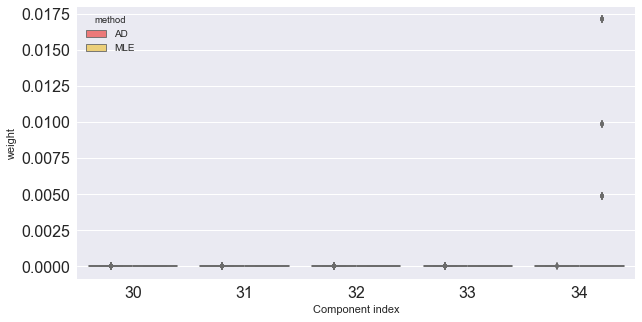

In [53]:
plt.figure(figsize=(10,5))

boxplot = sns.boxplot(x="comp", y="weight", hue="method", data=df5_gauss_other[df5_gauss_other["N"]==500],
                     palette=["#ff6666", "#ffd966", "#b3ff66"])
for patch in boxplot.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 1))
boxplot.set_xlabel('Component index')
sns_plot = boxplot.get_figure()
#for ax in sns_plot.get_axes():
#    ax.set_yscale('log')
plt.savefig("../../phd-thesis/TeX_files/weight_f_gauss_other_comp_N_500",dpi=100, transparent=True, bbox_inches='tight', pad_inches=0)

##N=1000
plt.figure(figsize=(10,5))
boxplot = sns.boxplot(x="comp", y="weight", hue="method", data=df5_gauss_other[df5_gauss_other["N"]==1000],
                     palette=["#ff6666", "#ffd966", "#b3ff66"])
for patch in boxplot.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 1))
boxplot.set_xlabel('Component index')
sns_plot = boxplot.get_figure()
#for ax in sns_plot.get_axes():
#    ax.set_yscale('log')
plt.savefig("../../phd-thesis/TeX_files/weight_f_gauss_other_comp_N_1000",dpi=100, transparent=True, bbox_inches='tight', pad_inches=0)


In [29]:
for i in [1, 30, 31, 32, 33, 34]:
    print data[0]['densities'][i]

## Gauss-laplace density weights 

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#simu_folder = "/Users/mehdi/temp/simus_weight_vector/GLU_valid_2017-06-12_18.37.51"
#folder  = simu_folder
#df_lambda = pd.read_csv(simu_folder+"/lambda_ad_mle.csv")
%matplotlib inline
df_gauss_laplace = df_lambda[['N', 'lapl_gauss_weight_vector_estim_lambda', "lapl_gauss_adapative_dantzig"]]


### Real components

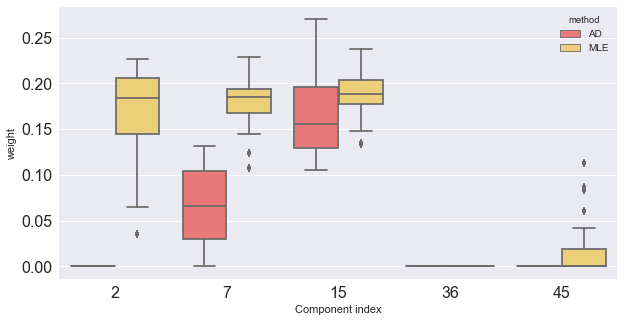

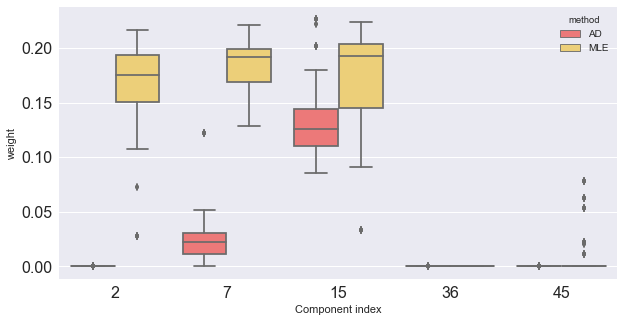

In [41]:
def extract(row):
    res = {}
    for i in [2,7,15,36,45]:
        res["mle_"+str(i)] = row['lapl_gauss_weight_vector_estim_lambda'][i]
        res["ad_"+str(i)] = row['lapl_gauss_adapative_dantzig'][i]
    res['N']= row['N']
    return pd.Series(res)
def extract_type(row):
    if "ad" in row["comp"]:
        method = "AD"
    else:
        method = "MLE"
    return pd.Series({'method': method})
def remove_method_comp(row):
    comp = row["comp"]
    comp = int(comp.split("_")[1])
    return pd.Series({'comp':comp, "N":row["N"],"weight": row["weight"], "method":row["method"] })

df2 = df_gauss_laplace.apply(extract, axis=1)
df3 = pd.melt(df2, id_vars=["N"], var_name="comp", value_name="weight")
df4 = pd.concat([df3, df3.apply(extract_type, axis =1)], axis=1)
df5 = df4.apply(remove_method_comp, axis=1)

plt.figure(figsize=(10,5))
boxplot = sns.boxplot(x="comp", y="weight", hue="method", data=df5[df5["N"]==500],
                     palette=["#ff6666", "#ffd966", "#b3ff66"])
for patch in boxplot.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 1))
boxplot.set_xlabel('Component index')
sns_plot = boxplot.get_figure()
#for ax in sns_plot.get_axes():
#    ax.set_yscale('log')
plt.savefig("../../phd-thesis/TeX_files/weight_f_gauss_laplace_real_comp_N_500",dpi=100, transparent=True, bbox_inches='tight', pad_inches=0)

plt.figure(figsize=(10,5))
boxplot = sns.boxplot(x="comp", y="weight", hue="method", data=df5[df5["N"]==1000],
                     palette=["#ff6666", "#ffd966", "#b3ff66"])
for patch in boxplot.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 1))
boxplot.set_xlabel('Component index')
sns_plot = boxplot.get_figure()
#for ax in sns_plot.get_axes():
#    ax.set_yscale('log')
plt.savefig("../../phd-thesis/TeX_files/weight_f_gauss_laplace_real_comp_N_1000",dpi=100, transparent=True, bbox_inches='tight', pad_inches=0)


### uniform components

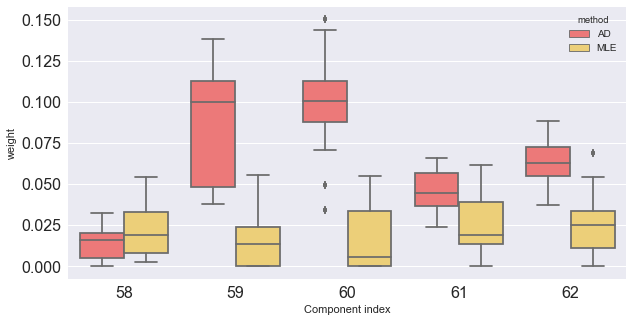

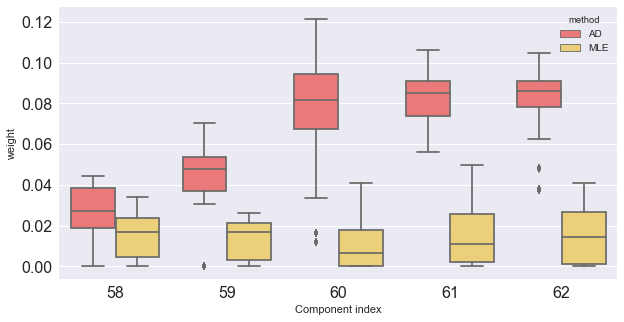

In [47]:
def extract(row):
    res = {}
    for i in [58, 59, 60, 61, 62]:
        res["mle_"+str(i)] = row['lapl_gauss_weight_vector_estim_lambda'][i]
        res["ad_"+str(i)] = row['lapl_gauss_adapative_dantzig'][i]
    res['N']= row['N']
    return pd.Series(res)
def extract_type(row):
    if "ad" in row["comp"]:
        method = "AD"
    else:
        method = "MLE"
    return pd.Series({'method': method})
def remove_method_comp(row):
    comp = row["comp"]
    comp = int(comp.split("_")[1])
    return pd.Series({'comp':comp, "N":row["N"],"weight": row["weight"], "method":row["method"] })

df2 = df_gauss_laplace.apply(extract, axis=1)
df3 = pd.melt(df2, id_vars=["N"], var_name="comp", value_name="weight")
df4 = pd.concat([df3, df3.apply(extract_type, axis =1)], axis=1)
df5_lapl_unif = df4.apply(remove_method_comp, axis=1)

plt.figure(figsize=(10,5))
boxplot = sns.boxplot(x="comp", y="weight", hue="method", data=df5_lapl_unif[df5_lapl_unif["N"]==500],
                     palette=["#ff6666", "#ffd966", "#b3ff66"])
for patch in boxplot.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 1))
boxplot.set_xlabel('Component index')
sns_plot = boxplot.get_figure()
#for ax in sns_plot.get_axes():
#    ax.set_yscale('log')
plt.savefig("../../phd-thesis/TeX_files/weight_f_gauss_laplace_unif_comp_N_500",dpi=100, transparent=True, bbox_inches='tight', pad_inches=0)

plt.figure(figsize=(10,5))
boxplot = sns.boxplot(x="comp", y="weight", hue="method", data=df5_lapl_unif[df5_lapl_unif["N"]==1000],
                     palette=["#ff6666", "#ffd966", "#b3ff66"])
for patch in boxplot.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 1))
boxplot.set_xlabel('Component index')
sns_plot = boxplot.get_figure()
#for ax in sns_plot.get_axes():
#    ax.set_yscale('log')
plt.savefig("../../phd-thesis/TeX_files/weight_f_gauss_laplace_unif_comp_N_1000",dpi=100, transparent=True, bbox_inches='tight', pad_inches=0)


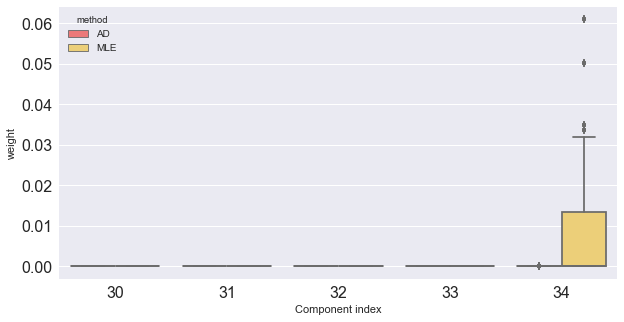

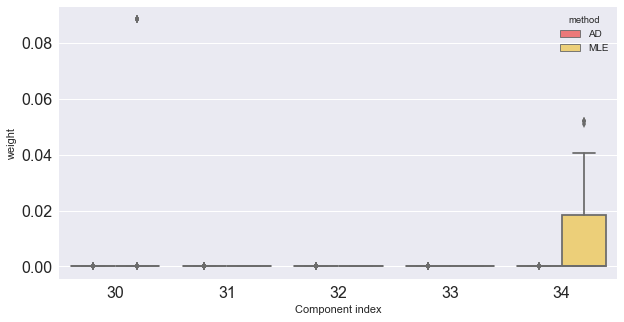

In [50]:
#Other components lapl

def extract(row):
    res = {}
    for i in [30, 31, 32, 33, 34]:
        res["mle_"+str(i)] = row['lapl_gauss_weight_vector_estim_lambda'][i]
        res["ad_"+str(i)] = row['lapl_gauss_adapative_dantzig'][i]
    res['N']= row['N']
    return pd.Series(res)
def extract_type(row):
    if "ad" in row["comp"]:
        method = "AD"
    else:
        method = "MLE"
    return pd.Series({'method': method})
def remove_method_comp(row):
    comp = row["comp"]
    comp = int(comp.split("_")[1])
    return pd.Series({'comp':comp, "N":row["N"],"weight": row["weight"], "method":row["method"] })

df2 = df_gauss_laplace.apply(extract, axis=1)
df3 = pd.melt(df2, id_vars=["N"], var_name="comp", value_name="weight")
df4 = pd.concat([df3, df3.apply(extract_type, axis =1)], axis=1)
df5_lapl_other = df4.apply(remove_method_comp, axis=1)

plt.figure(figsize=(10,5))
boxplot = sns.boxplot(x="comp", y="weight", hue="method", data=df5_lapl_other[df5_lapl_other["N"]==500],
                     palette=["#ff6666", "#ffd966", "#b3ff66"])
for patch in boxplot.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 1))
boxplot.set_xlabel('Component index')
sns_plot = boxplot.get_figure()
#for ax in sns_plot.get_axes():
#    ax.set_yscale('log')
plt.savefig("../../phd-thesis/TeX_files/weight_f_gauss_laplace_other_comp_N_500",dpi=100, transparent=True, bbox_inches='tight', pad_inches=0)

plt.figure(figsize=(10,5))
boxplot = sns.boxplot(x="comp", y="weight", hue="method", data=df5_lapl_other[df5_lapl_other["N"]==1000],
                     palette=["#ff6666", "#ffd966", "#b3ff66"])
for patch in boxplot.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 1))
boxplot.set_xlabel('Component index')
sns_plot = boxplot.get_figure()
#for ax in sns_plot.get_axes():
#    ax.set_yscale('log')
plt.savefig("../../phd-thesis/TeX_files/weight_f_gauss_laplace_other_comp_N_1000",dpi=100, transparent=True, bbox_inches='tight', pad_inches=0)


### Uniform laplace and gauss N =1000


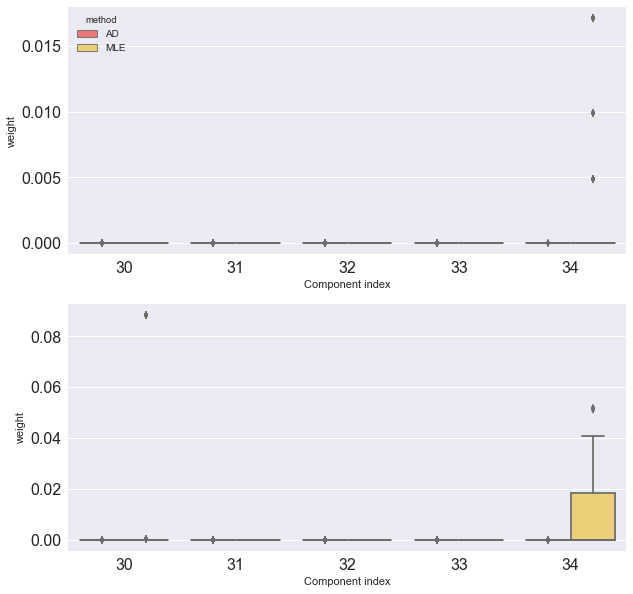

In [59]:
#Uniform laplace and gauss N =1000
fig, ax = plt.subplots(2,1, figsize=[10,10])
boxplot = sns.boxplot(x="comp", y="weight", hue="method", data=df5_gauss_other[df5_gauss_other["N"]==1000],
                     palette=["#ff6666", "#ffd966", "#b3ff66"], ax=ax[0])
for patch in boxplot.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 1))
boxplot.set_xlabel('Component index')
sns_plot_gauss = boxplot.get_figure()
#for ax in sns_plot.get_axes():
#    ax.set_yscale('log')

boxplot = sns.boxplot(x="comp", y="weight", hue="method", data=df5_lapl_other[df5_lapl_other["N"]==1000],
                     palette=["#ff6666", "#ffd966", "#b3ff66"], ax=ax[1])
for patch in boxplot.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 1))
boxplot.set_xlabel('Component index')
sns_plot_lapl = boxplot.get_figure()
legend = ax[1].legend()
legend.remove()

plt.savefig("../../phd-thesis/TeX_files/weight_f_gauss_and_laplace_other_comp_N_1000",dpi=100, transparent=True, bbox_inches='tight', pad_inches=0)

#for ax in sns_plot.get_axes():
#    ax.set_yscale('log')

### around one component


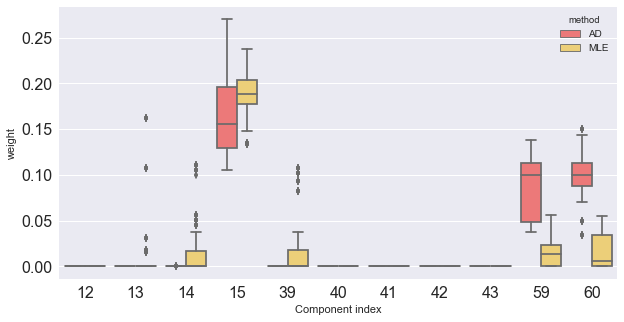

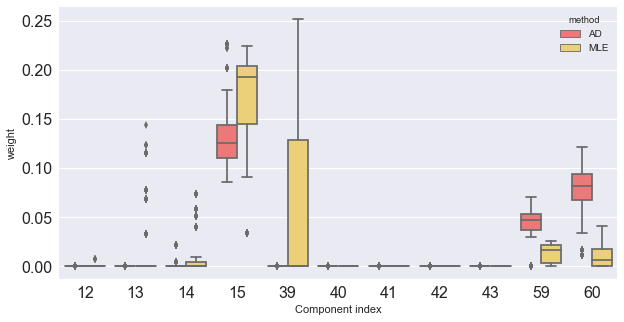

In [44]:
def extract(row):
    res = {}
    for i in [12, 13,14,15,39,40,41,42,43, 59, 60]:
        res["mle_"+str(i)] = row['lapl_gauss_weight_vector_estim_lambda'][i]
        res["ad_"+str(i)] = row['lapl_gauss_adapative_dantzig'][i]
    res['N']= row['N']
    return pd.Series(res)
def extract_type(row):
    if "ad" in row["comp"]:
        method = "AD"
    else:
        method = "MLE"
    return pd.Series({'method': method})
def remove_method_comp(row):
    comp = row["comp"]
    comp = int(comp.split("_")[1])
    return pd.Series({'comp':comp, "N":row["N"],"weight": row["weight"], "method":row["method"] })

df2 = df_gauss_laplace.apply(extract, axis=1)
df3 = pd.melt(df2, id_vars=["N"], var_name="comp", value_name="weight")
df4 = pd.concat([df3, df3.apply(extract_type, axis =1)], axis=1)
df5 = df4.apply(remove_method_comp, axis=1)

plt.figure(figsize=(10,5))
boxplot = sns.boxplot(x="comp", y="weight", hue="method", data=df5[df5["N"]==500],
                     palette=["#ff6666", "#ffd966", "#b3ff66"])
for patch in boxplot.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 1))
boxplot.set_xlabel('Component index')
sns_plot = boxplot.get_figure()
#for ax in sns_plot.get_axes():
#    ax.set_yscale('log')
plt.savefig("../../phd-thesis/TeX_files/weight_f_gauss_laplace_around_comp_N_500",dpi=100, transparent=True, bbox_inches='tight', pad_inches=0)

plt.figure(figsize=(10,5))
boxplot = sns.boxplot(x="comp", y="weight", hue="method", data=df5[df5["N"]==1000],
                     palette=["#ff6666", "#ffd966", "#b3ff66"])
for patch in boxplot.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 1))
boxplot.set_xlabel('Component index')
sns_plot = boxplot.get_figure()
#for ax in sns_plot.get_axes():
#    ax.set_yscale('log')
plt.savefig("../../phd-thesis/TeX_files/weight_f_gauss_laplace_around_comp_N_1000",dpi=100, transparent=True, bbox_inches='tight', pad_inches=0)


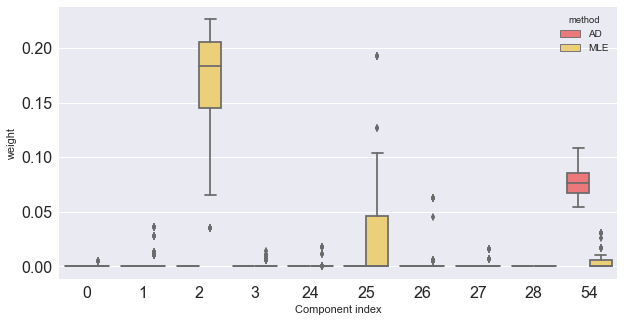

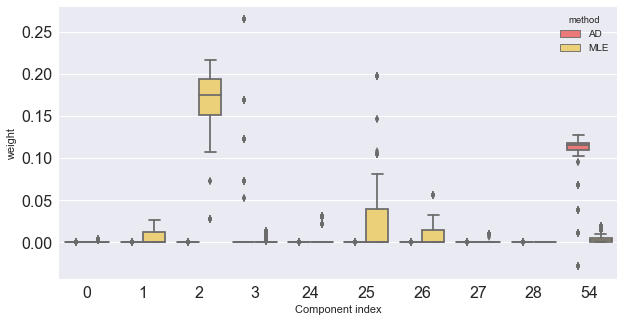

In [45]:
def extract(row):
    res = {}
    for i in [0,1,2,3,24,25,26,27,28,54]:
        res["mle_"+str(i)] = row['lapl_gauss_weight_vector_estim_lambda'][i]
        res["ad_"+str(i)] = row['lapl_gauss_adapative_dantzig'][i]
    res['N']= row['N']
    return pd.Series(res)
def extract_type(row):
    if "ad" in row["comp"]:
        method = "AD"
    else:
        method = "MLE"
    return pd.Series({'method': method})
def remove_method_comp(row):
    comp = row["comp"]
    comp = int(comp.split("_")[1])
    return pd.Series({'comp':comp, "N":row["N"],"weight": row["weight"], "method":row["method"] })

df2 = df_gauss_laplace.apply(extract, axis=1)
df3 = pd.melt(df2, id_vars=["N"], var_name="comp", value_name="weight")
df4 = pd.concat([df3, df3.apply(extract_type, axis =1)], axis=1)
df5 = df4.apply(remove_method_comp, axis=1)

plt.figure(figsize=(10,5))
boxplot = sns.boxplot(x="comp", y="weight", hue="method", data=df5[df5["N"]==500],
                     palette=["#ff6666", "#ffd966", "#b3ff66"])
for patch in boxplot.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 1))
boxplot.set_xlabel('Component index')
sns_plot = boxplot.get_figure()
#for ax in sns_plot.get_axes():
#    ax.set_yscale('log')
plt.savefig("../../phd-thesis/TeX_files/weight_f_gauss_laplace_around2_comp_N_500",dpi=100, transparent=True, bbox_inches='tight', pad_inches=0)

plt.figure(figsize=(10,5))
boxplot = sns.boxplot(x="comp", y="weight", hue="method", data=df5[df5["N"]==1000],
                     palette=["#ff6666", "#ffd966", "#b3ff66"])
for patch in boxplot.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 1))
boxplot.set_xlabel('Component index')
sns_plot = boxplot.get_figure()
#for ax in sns_plot.get_axes():
#    ax.set_yscale('log')
plt.savefig("../../phd-thesis/TeX_files/weight_f_gauss_laplace_around2_comp_N_1000",dpi=100, transparent=True, bbox_inches='tight', pad_inches=0)


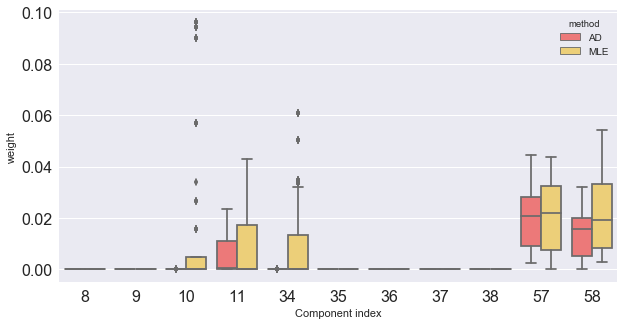

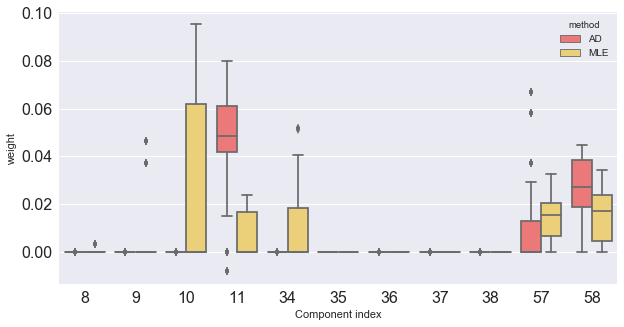

In [46]:
def extract(row):
    res = {}
    for i in [8,9,10,11,34,35,36,37,38,57,58]:
        res["mle_"+str(i)] = row['lapl_gauss_weight_vector_estim_lambda'][i]
        res["ad_"+str(i)] = row['lapl_gauss_adapative_dantzig'][i]
    res['N']= row['N']
    return pd.Series(res)
def extract_type(row):
    if "ad" in row["comp"]:
        method = "AD"
    else:
        method = "MLE"
    return pd.Series({'method': method})
def remove_method_comp(row):
    comp = row["comp"]
    comp = int(comp.split("_")[1])
    return pd.Series({'comp':comp, "N":row["N"],"weight": row["weight"], "method":row["method"] })

df2 = df_gauss_laplace.apply(extract, axis=1)
df3 = pd.melt(df2, id_vars=["N"], var_name="comp", value_name="weight")
df4 = pd.concat([df3, df3.apply(extract_type, axis =1)], axis=1)
df5 = df4.apply(remove_method_comp, axis=1)

plt.figure(figsize=(10,5))
boxplot = sns.boxplot(x="comp", y="weight", hue="method", data=df5[df5["N"]==500],
                     palette=["#ff6666", "#ffd966", "#b3ff66"])
for patch in boxplot.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 1))
boxplot.set_xlabel('Component index')
sns_plot = boxplot.get_figure()
#for ax in sns_plot.get_axes():
#    ax.set_yscale('log')
plt.savefig("../../phd-thesis/TeX_files/weight_f_gauss_laplace_around3_comp_N_500",dpi=100, transparent=True, bbox_inches='tight', pad_inches=0)

plt.figure(figsize=(10,5))
boxplot = sns.boxplot(x="comp", y="weight", hue="method", data=df5[df5["N"]==1000],
                     palette=["#ff6666", "#ffd966", "#b3ff66"])
for patch in boxplot.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 1))
boxplot.set_xlabel('Component index')
sns_plot = boxplot.get_figure()
#for ax in sns_plot.get_axes():
#    ax.set_yscale('log')
plt.savefig("../../phd-thesis/TeX_files/weight_f_gauss_laplace_around3_comp_N_1000",dpi=100, transparent=True, bbox_inches='tight', pad_inches=0)


# Details of densities

In [37]:
for i in range(len(data[0]['densities'])):
    print i,
    cvb= data[0]['densities'][i]
    try:
        print cvb, cvb.mean(), cvb.var()
    except:
        print cvb, float(cvb.mean), float(cvb.cov)

0 <scipy.stats._multivariate.multivariate_normal_frozen object at 0x10e9eb210> <scipy.stats._multivariate.multivariate_normal_frozen object at 0x10e9eb210> 0.0 1.0
1 <scipy.stats._multivariate.multivariate_normal_frozen object at 0x10e3847d0> <scipy.stats._multivariate.multivariate_normal_frozen object at 0x10e3847d0> 0.0 0.1
2 <scipy.stats._multivariate.multivariate_normal_frozen object at 0x10e3842d0> <scipy.stats._multivariate.multivariate_normal_frozen object at 0x10e3842d0> 0.0 0.01
3 <scipy.stats._multivariate.multivariate_normal_frozen object at 0x10e384890> <scipy.stats._multivariate.multivariate_normal_frozen object at 0x10e384890> 0.0 0.001
4 <scipy.stats._multivariate.multivariate_normal_frozen object at 0x10e384f50> <scipy.stats._multivariate.multivariate_normal_frozen object at 0x10e384f50> 0.2 1.0
5 <scipy.stats._multivariate.multivariate_normal_frozen object at 0x10e384210> <scipy.stats._multivariate.multivariate_normal_frozen object at 0x10e384210> 0.2 0.1
6 <scipy.stat

AttributeError: 'uniform_nonzero' object has no attribute 'mean'

In [ ]:
 0.97 & 0.48 & 0.76 \\     \hline

 0.56 & 0.52 & 0.86 \\   \hline

 1.00 & 0.11 & 0.25 \\   

In [140]:
nodes_gauss = [0, 0.2, 0.4, 0.6, 0.8, 1]
var_list = [1, 10**(-1), 10**(-2), 10**(-3)]
densities = []
i=0
for m in nodes_gauss:
    for var in var_list:
        print i, "&", "Normal(",m,",",var,")"
        i+=1
scales =[0.05, 0.1, 0.2, 0.5, 1]
nodes_lapl = [0, 0.2, 0.4, 0.6, 0.8, 1]
for m in nodes_lapl:
    for scale in scales:
        #densities.append(laplace(loc=m, scale=scale))
        print i, "&", "Laplace(",m,",",scale,")"
        i+=1
#50 uniform densities 
size_uniform = 10
for j in range(size_uniform):
    #densities.append(uniform_nonzero(i*1./size_uniform, 1./size_uniform))
    print i, "&", "Uniform(",j*1./size_uniform,",", (j+1.)/size_uniform,")"
    i+=1

0 & Normal( 0 , 1 )
1 & Normal( 0 , 0.1 )
2 & Normal( 0 , 0.01 )
3 & Normal( 0 , 0.001 )
4 & Normal( 0.2 , 1 )
5 & Normal( 0.2 , 0.1 )
6 & Normal( 0.2 , 0.01 )
7 & Normal( 0.2 , 0.001 )
8 & Normal( 0.4 , 1 )
9 & Normal( 0.4 , 0.1 )
10 & Normal( 0.4 , 0.01 )
11 & Normal( 0.4 , 0.001 )
12 & Normal( 0.6 , 1 )
13 & Normal( 0.6 , 0.1 )
14 & Normal( 0.6 , 0.01 )
15 & Normal( 0.6 , 0.001 )
16 & Normal( 0.8 , 1 )
17 & Normal( 0.8 , 0.1 )
18 & Normal( 0.8 , 0.01 )
19 & Normal( 0.8 , 0.001 )
20 & Normal( 1 , 1 )
21 & Normal( 1 , 0.1 )
22 & Normal( 1 , 0.01 )
23 & Normal( 1 , 0.001 )
24 & Laplace( 0 , 0.05 )
25 & Laplace( 0 , 0.1 )
26 & Laplace( 0 , 0.2 )
27 & Laplace( 0 , 0.5 )
28 & Laplace( 0 , 1 )
29 & Laplace( 0.2 , 0.05 )
30 & Laplace( 0.2 , 0.1 )
31 & Laplace( 0.2 , 0.2 )
32 & Laplace( 0.2 , 0.5 )
33 & Laplace( 0.2 , 1 )
34 & Laplace( 0.4 , 0.05 )
35 & Laplace( 0.4 , 0.1 )
36 & Laplace( 0.4 , 0.2 )
37 & Laplace( 0.4 , 0.5 )
38 & Laplace( 0.4 , 1 )
39 & Laplace( 0.6 , 0.05 )
40 & Laplace( 0.

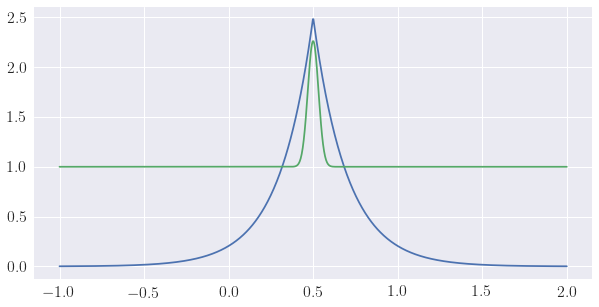

In [207]:
import numpy as np
from scipy.stats import laplace, multivariate_normal
x = np.linspace(-1,2,1000)
plt.figure(figsize=(10,5))
plt.plot(x,laplace(0.5, 0.2).pdf(x))
plt.plot(x, 0.1*multivariate_normal(0.5, 0.001).pdf(x)+np.ones(1000))
plt.savefig("../../phd-thesis/TeX_files/laplaceVSgauss_uniform",dpi=100, transparent=True, bbox_inches='tight', pad_inches=0)